In [77]:
#Helper packages

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import math
import missingno as msn

#Modelling packages

import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

|  Feature |  Description |
|:---:|:---:|
|  Model Year |  The year when the car was built. |
|  Mfr Name | Name of the car manufacturer.  |
| Division  | The car brand.  |
|  Carline |  The brand's subdivision. |
|  Eng Displ | Engine's volume.  |
|   |   |   |   |   |
|   |   |   |   |   |

<font size="8">Importing and Cleaning Data</font>

In [4]:
fuel_file = pd.read_excel("/home/emumen/Documents/Misk-DSI-2022/Predicting-and-Analyzing-Fuel-Efficiency/data/Fuel_Econ.xlsx")
fuel_file.to_csv("/home/emumen/Documents/Misk-DSI-2022/Predicting-and-Analyzing-Fuel-Efficiency/data/Fuel_Econ.csv", index = None, header = True)
fuel = pd.read_csv("/home/emumen/Documents/Misk-DSI-2022/Predicting-and-Analyzing-Fuel-Efficiency/data/Fuel_Econ.csv")

/tmp/ipykernel_2923/470160290.py:3: DtypeWarning: Columns (46,78,93,96,98,123,124,138,142,143,146,150,163) have mixed types. Specify dtype option on import or set low_memory=False.
  fuel = pd.read_csv("/home/emumen/Documents/Misk-DSI-2022/Predicting-and-Analyzing-Fuel-Efficiency/data/Fuel_Econ.csv")


In [5]:
fuel.describe()

,Unnamed: 0,Model Year,Index (Model Type Index),Eng Displ,# Cyl,City FE (Guide) - Conventional Fuel,Hwy FE (Guide) - Conventional Fuel,Comb FE (Guide) - Conventional Fuel,City Unrd Adj FE - Conventional Fuel,Hwy Unrd Adj FE - Conventional Fuel,...,City CO2 Rounded Adjusted,Hwy CO2 Rounded Adjusted,Comb CO2 Rounded Adjusted (as shown on FE Label),CO2-PHEV Composite Rounded Adjusted Combined CO2,240V Charge Time at 240 volts (hours),120V Charge time at 120 Volts (hours),PHEV Total Driving Range (rounded to nearest 10 miles)DISTANCE,City PHEV Composite MPGe,Hwy PHEV Composite MPGe,Comb PHEV Composite MPGe
count,12649.000000,12649.000000,12649.000000,12649.000000,12649.000000,12649.000000,12649.000000,12649.000000,12649.000000,12649.000000,...,12649.000000,12649.000000,12649.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,594.235196,2017.708198,228.877382,3.176259,5.659973,20.423749,27.512768,23.034469,20.414774,27.490093,...,467.631275,340.385406,410.479485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,353.686280,2.978098,240.111025,1.354939,1.870629,5.953891,6.184251,5.950546,5.962880,6.195295,...,120.972274,77.742494,99.821253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,2013.000000,1.000000,0.900000,3.000000,8.000000,11.000000,9.000000,7.762000,10.923200,...,152.000000,149.000000,151.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,287.000000,2015.000000,38.000000,2.000000,4.000000,16.000000,23.000000,19.000000,16.359500,23.031900,...,384.000000,285.000000,339.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,583.000000,2018.000000,116.000000,3.000000,6.000000,20.000000,27.000000,22.000000,19.585800,27.000000,...,456.000000,330.000000,401.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,899.000000,2020.000000,401.000000,3.800000,6.000000,23.000000,31.000000,26.000000,23.155200,31.133000,...,541.000000,386.000000,471.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1289.000000,2023.000000,999.000000,8.400000,16.000000,58.000000,60.000000,59.000000,58.470000,60.206700,...,1135.000000,818.000000,979.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Columns: 164 entries, Unnamed: 0 to Trans as listed in FE Guide (derived from col AA thru AF)
dtypes: float64(62), int64(16), object(86)
memory usage: 15.8+ MB


<AxesSubplot:>

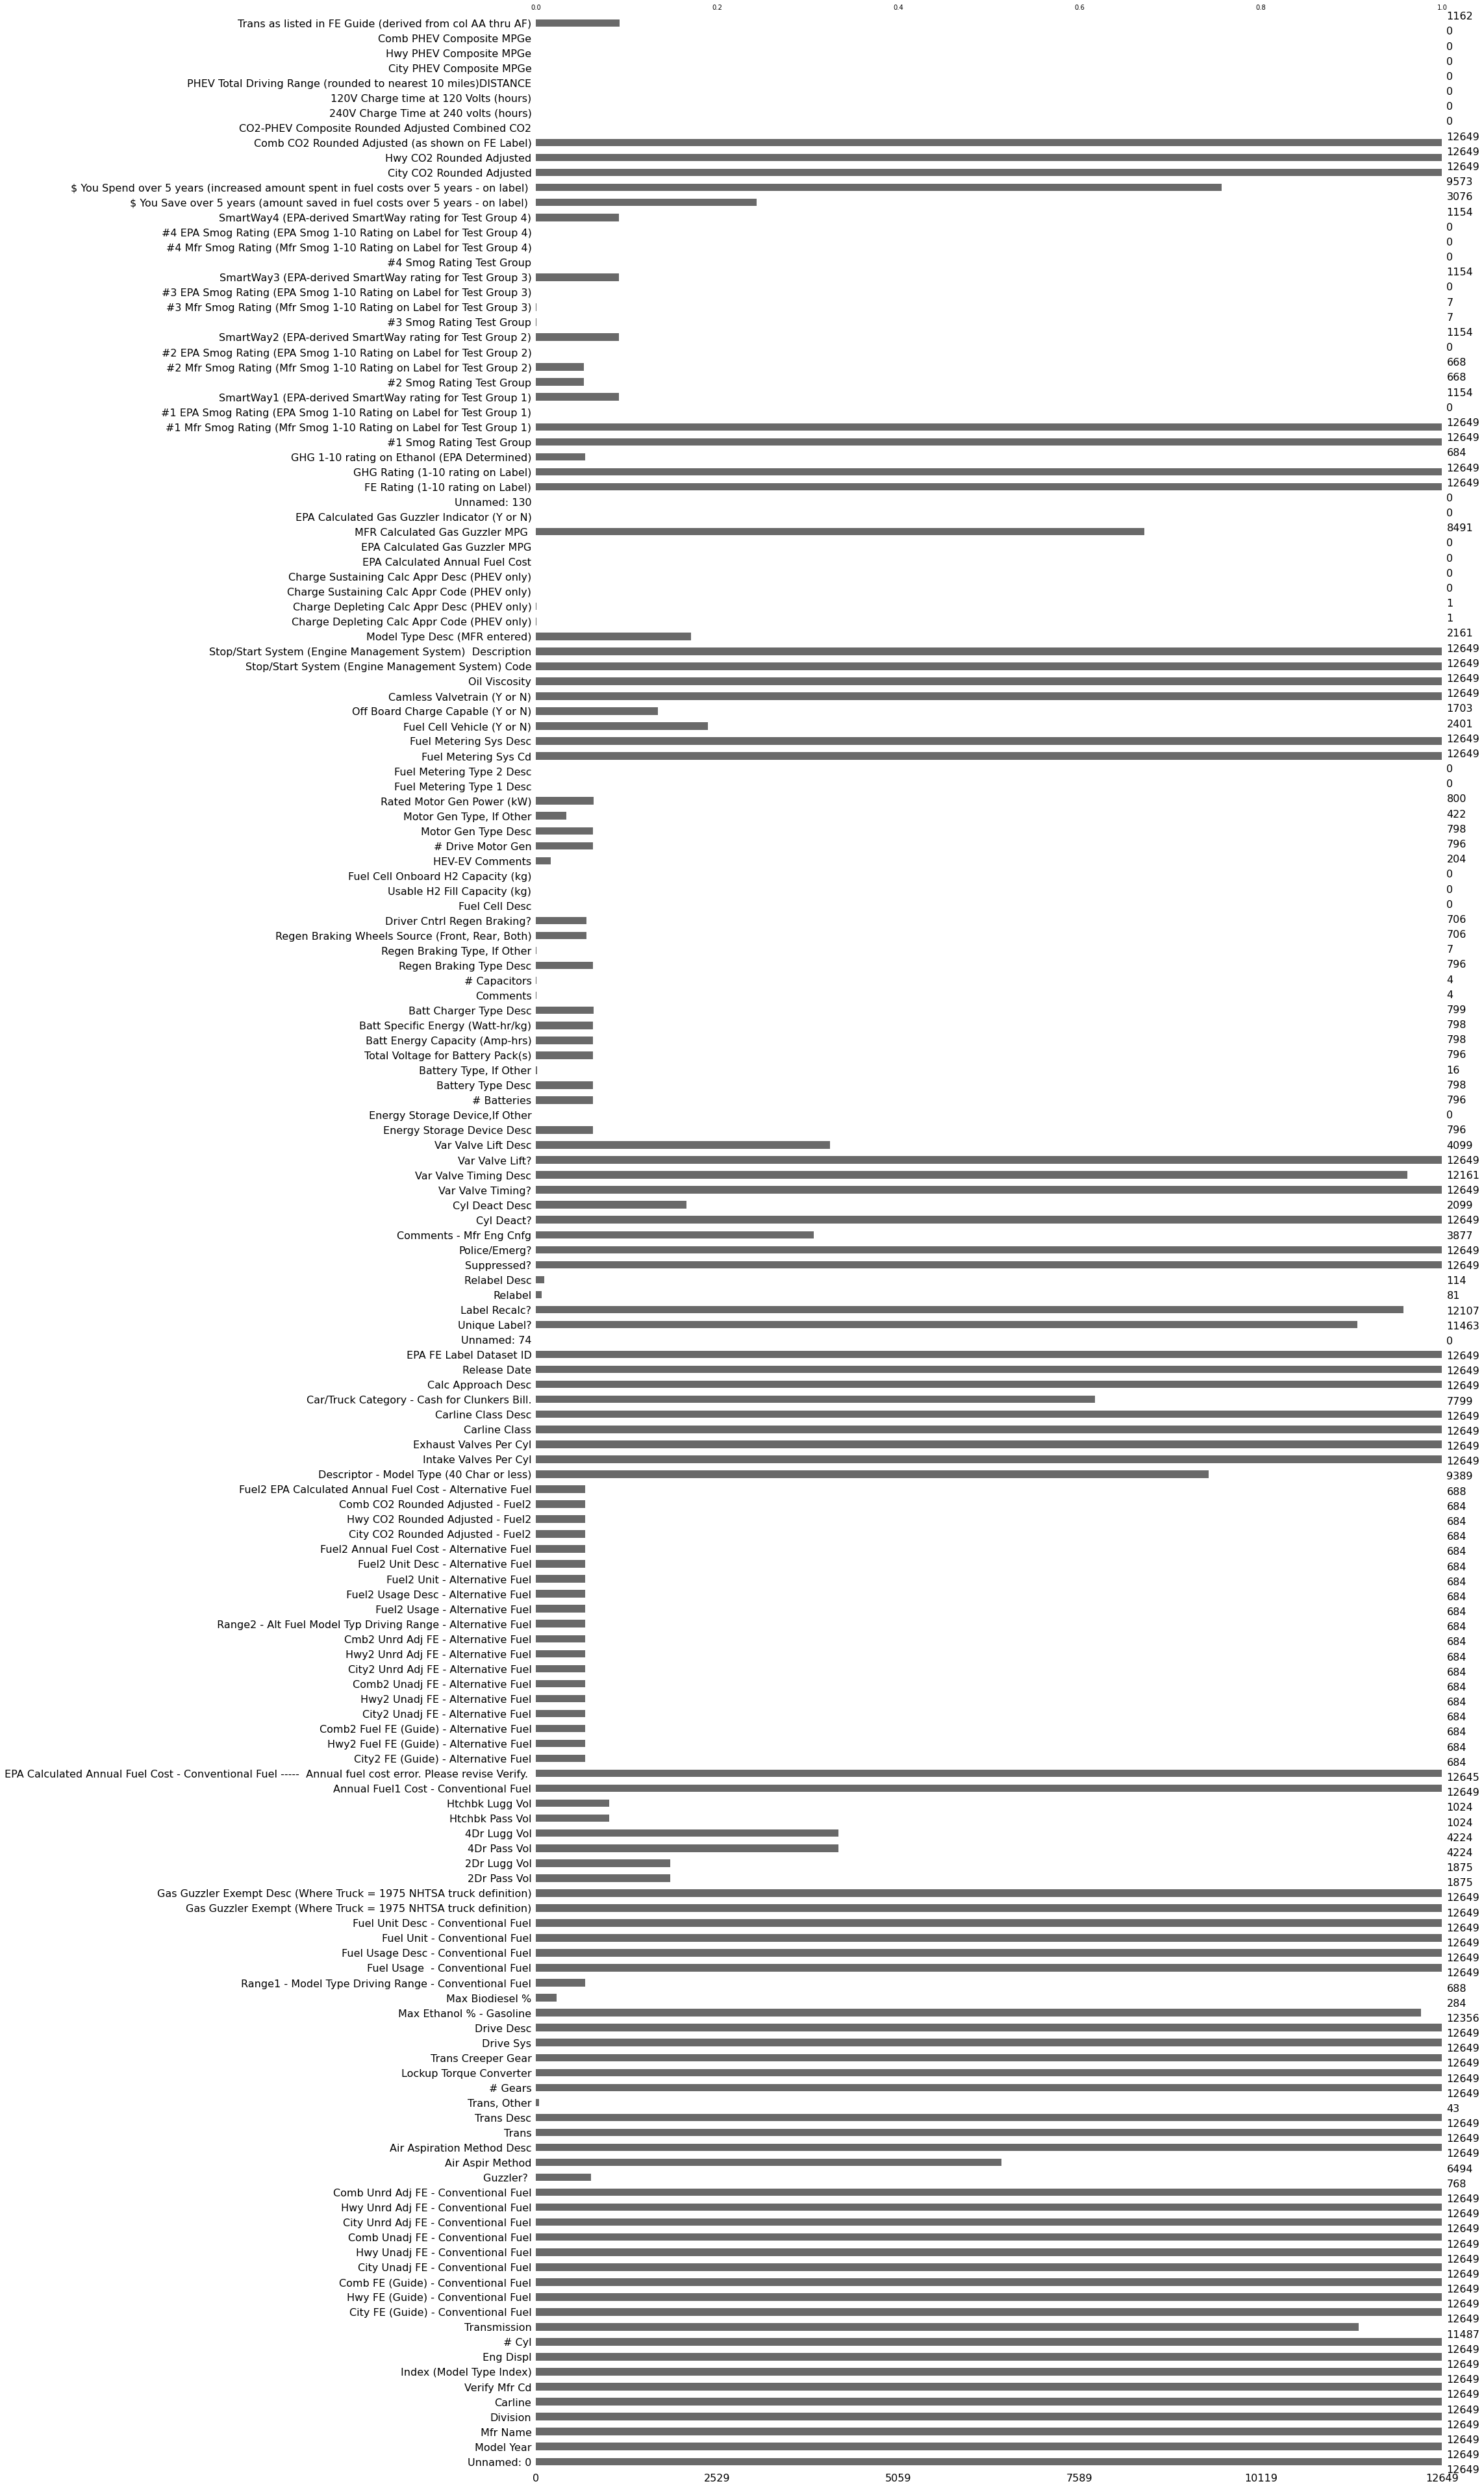

In [7]:
msn.bar(fuel)

<AxesSubplot:>

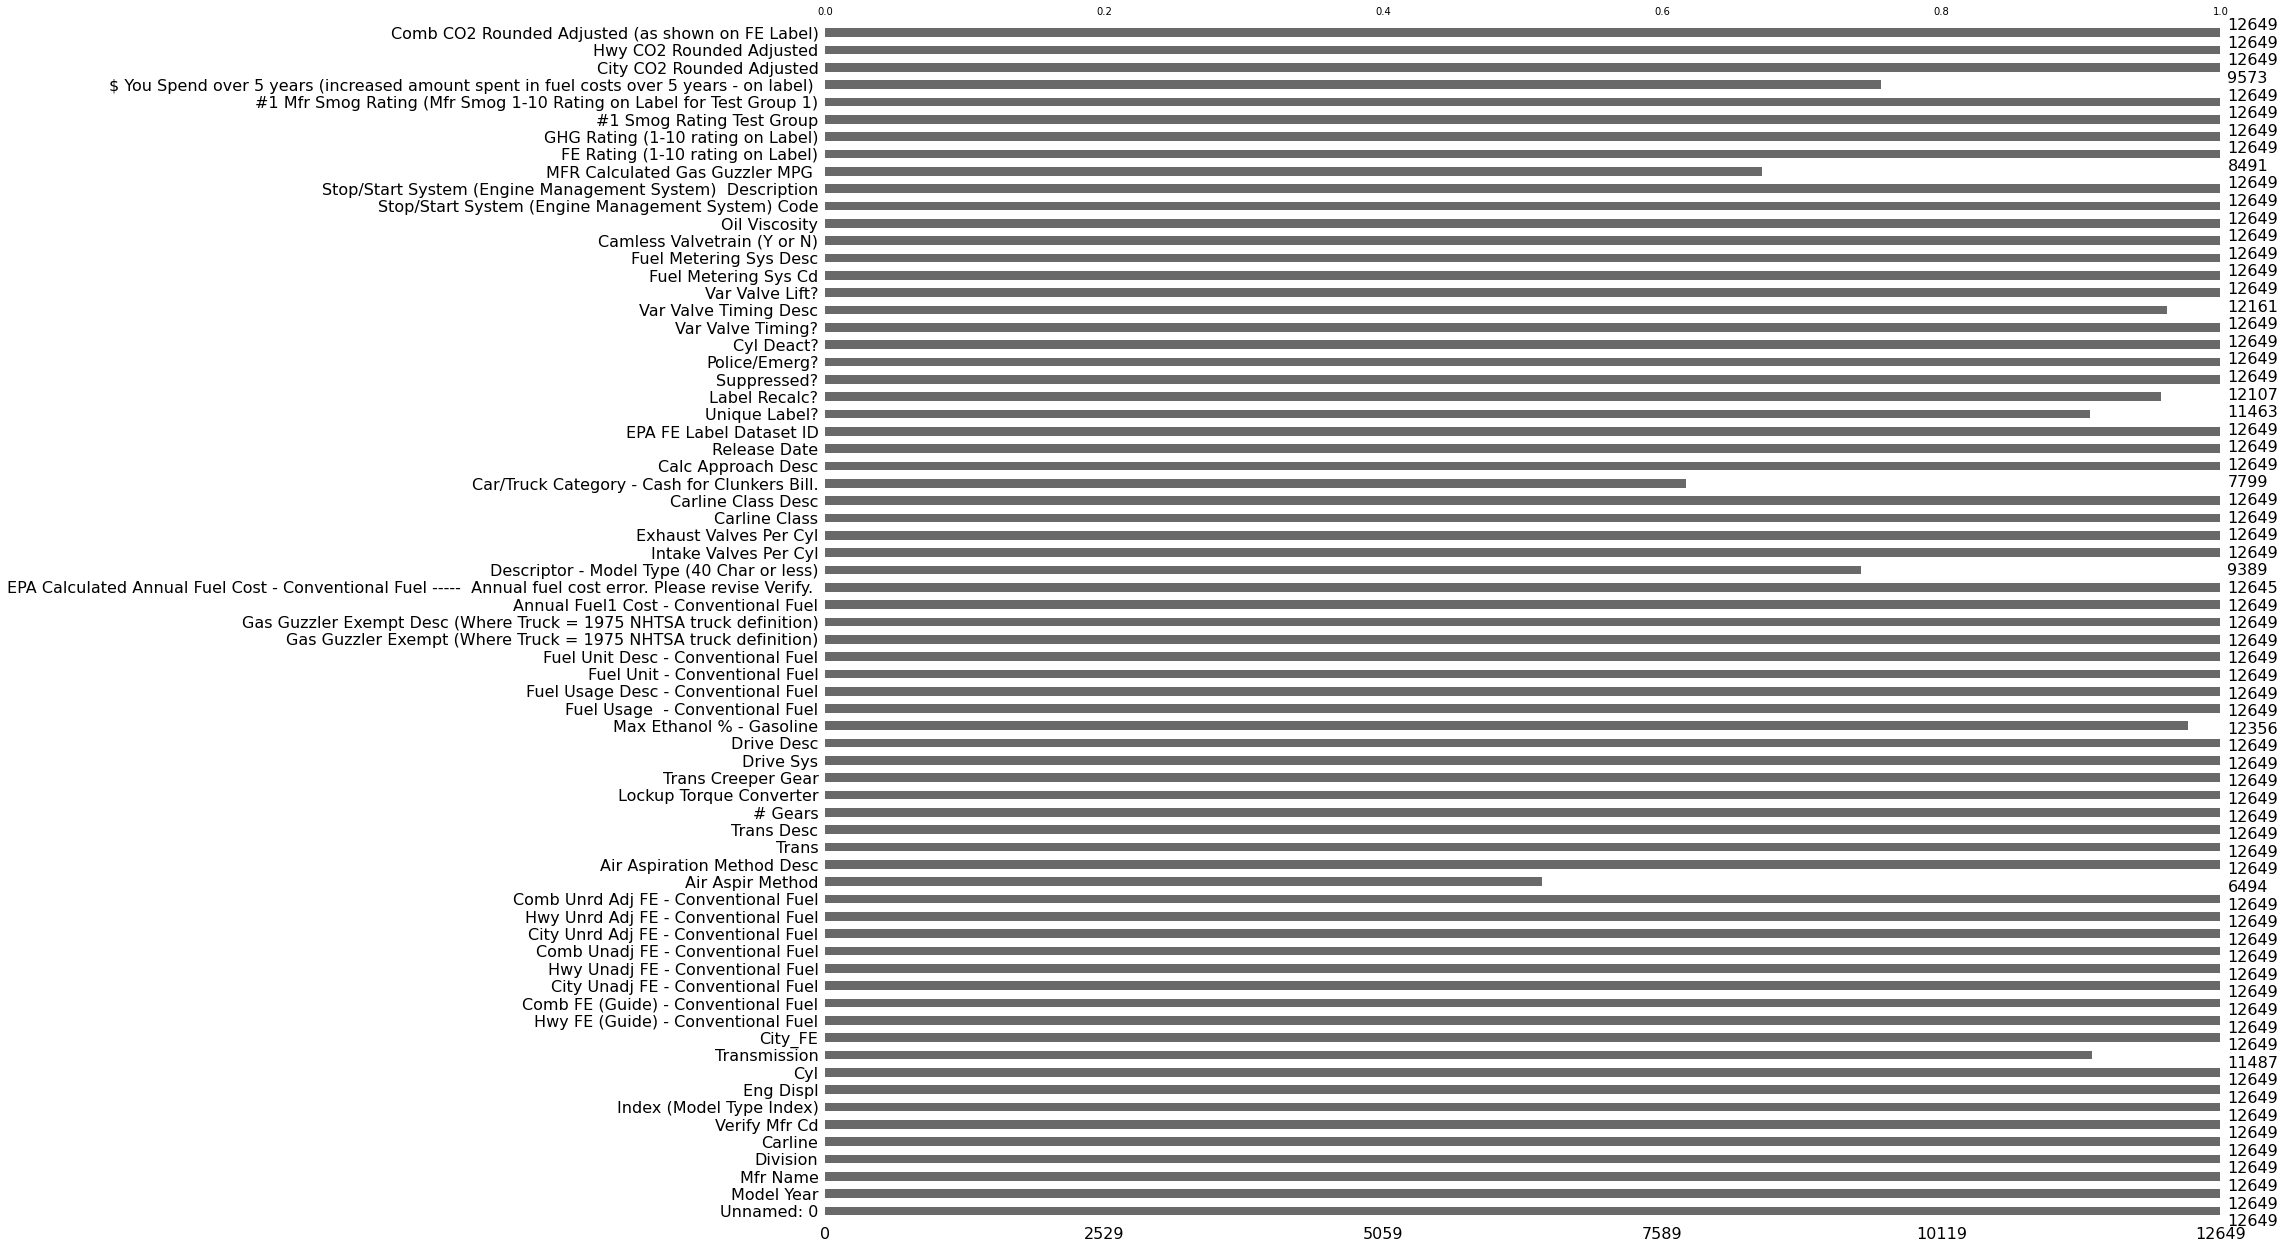

In [35]:
Columns = []
for column in fuel:
    if fuel[column].isna().sum() >= 0.6*12649:
#    if msn.bar(column) == 0:
        Columns.append(column)
    else:
        continue
fuel.drop(Columns, axis = 1, inplace = True)
#epa.drop("Cert Region", axis = 1, inplace = True)
fuel.fillna(method ='pad')
fuel.rename(columns = {'# Cyl':'Cyl'}, inplace = True)
fuel.rename(columns = {'City FE (Guide) - Conventional Fuel': 'City_FE'}, inplace = True)
#print(Columns)
msn.bar(fuel)

In [56]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Data columns (total 69 columns):
 #   Column                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                 12649 non-null  int64  
 1   Model Year                                                                                                 12649 non-null  int64  
 2   Mfr Name                                                                                                   12649 non-null  object 
 3   Division                                                                                                   12649 non-null  object 
 4   Carline                                                               

<font size="8">Exploratory Data Analysis</font>

In [9]:
fuel.head(20)

,Unnamed: 0,Model Year,Mfr Name,Division,Carline,Verify Mfr Cd,Index (Model Type Index),Eng Displ,# Cyl,Transmission,...,Stop/Start System (Engine Management System) Description,MFR Calculated Gas Guzzler MPG,FE Rating (1-10 rating on Label),GHG Rating (1-10 rating on Label),#1 Smog Rating Test Group,#1 Mfr Smog Rating (Mfr Smog 1-10 Rating on Label for Test Group 1),$ You Spend over 5 years (increased amount spent in fuel costs over 5 years - on label),City CO2 Rounded Adjusted,Hwy CO2 Rounded Adjusted,Comb CO2 Rounded Adjusted (as shown on FE Label)
0,0,2017,Honda,Acura,NSX,HNX,3,3.5,6,Auto(AM-S9),...,Yes,29.5,4,4,HHNXV03.5KH4,6,3000.0,419,406,420
1,1,2017,FCA US LLC,ALFA ROMEO,4C,CRX,36,1.8,4,Auto(AM6),...,No,34.7,6,6,HCRXV01.85P0,5,500.0,365,259,317
2,2,2017,aston martin,Aston Martin Lagonda Ltd,V12 Vantage S,ASX,2,6.0,12,Auto(AM7),...,No,18.3,1,1,HASXV06.0VHB,6,8000.0,737,485,624
3,3,2017,aston martin,Aston Martin Lagonda Ltd,V12 Vantage S,ASX,3,6.0,12,Manual(M7),...,No,15.5,1,1,HASXV06.0VHB,6,10500.0,873,541,724
4,4,2017,Volkswagen Group of,Audi,R8,VGA,3,5.2,10,Auto(AM-S7),...,No,21.2,3,3,HVGAV05.2NLE,5,5250.0,609,409,519
5,5,2017,Volkswagen Group of,Audi,R8 Spyder,VGA,4,5.2,10,Auto(AM-S7),...,No,21.2,3,3,HVGAV05.2NLE,5,5250.0,609,409,519
6,6,2017,Volkswagen Group of,Audi,TT Roadster quattro,VGA,61,2.0,4,Auto(AM-S6),...,No,33.5,6,6,HVGAV02.0APA,8,NaN,373,290,336
7,7,2017,General Motors,Chevrolet,CORVETTE,GMX,228,6.2,8,Auto(S8),...,No,20.6,2,2,HGMXV06.2090,5,6000.0,665,388,540
8,8,2017,General Motors,Chevrolet,CORVETTE,GMX,189,6.2,8,Auto(S8),...,No,24.2,4,4,HGMXV06.2090,5,4000.0,585,344,477
9,9,2017,General Motors,Chevrolet,CORVETTE,GMX,223,6.2,8,Manual(M7),...,No,22.8,3,3,HGMXV06.2090,5,4750.0,587,400,503


In [ ]:
#mile_eff = fuel.groupby('Air Aspiration Method Desc')[['City FE (Guide) - Conventional Fuel']].mean()
#print(mile_eff)
#mile_eff
#plt.bar(mile_eff, color = 'cyan', width = 0.4)
#plt.xlabel('Air Aspiration')
#plt.ylabel('Average Fuel Efficiency Score')
#plt.title('The effect of a Cars Aspiration Type on Their Fuel Efficiency Performance')
#plt.show()

In [15]:
fuel.corr().style.background_gradient()

,Unnamed: 0,Model Year,Index (Model Type Index),Eng Displ,# Cyl,City FE (Guide) - Conventional Fuel,Hwy FE (Guide) - Conventional Fuel,Comb FE (Guide) - Conventional Fuel,City Unrd Adj FE - Conventional Fuel,Hwy Unrd Adj FE - Conventional Fuel,Comb Unrd Adj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Annual Fuel1 Cost - Conventional Fuel,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Carline Class,EPA FE Label Dataset ID,$ You Spend over 5 years (increased amount spent in fuel costs over 5 years - on label),City CO2 Rounded Adjusted,Hwy CO2 Rounded Adjusted,Comb CO2 Rounded Adjusted (as shown on FE Label)
Unnamed: 0,1.000000,-0.072862,0.190848,0.105756,0.016079,-0.125910,-0.248517,-0.170646,-0.126819,-0.248618,-0.170727,0.004741,0.136097,0.045781,-0.133179,-0.133027,0.743114,-0.058963,-0.018363,0.127040,0.246428,0.170571
Model Year,-0.072862,1.000000,0.095604,-0.056838,-0.036971,0.058458,-0.019303,0.035082,0.060038,-0.017171,0.035802,0.331610,-0.144854,-0.299156,0.006558,0.013963,0.114222,0.992280,0.077578,-0.060725,0.015521,-0.033852
Index (Model Type Index),0.190848,0.095604,1.000000,0.267704,0.210102,-0.265285,-0.309785,-0.287360,-0.265827,-0.309622,-0.285908,0.216800,0.069893,0.194270,-0.347895,-0.340250,0.258303,0.098217,0.097474,0.256685,0.304602,0.278071
Eng Displ,0.105756,-0.056838,0.267704,1.000000,0.923485,-0.716610,-0.746428,-0.750008,-0.718113,-0.747632,-0.750450,0.220440,0.157151,0.747455,-0.551536,-0.568281,0.067596,-0.051011,0.725613,0.859441,0.787789,0.848499
# Cyl,0.016079,-0.036971,0.210102,0.923485,1.000000,-0.692946,-0.712550,-0.722175,-0.694138,-0.713198,-0.722639,0.244885,0.109845,0.749837,-0.356357,-0.391797,-0.016335,-0.029915,0.762365,0.847913,0.759012,0.830947
City FE (Guide) - Conventional Fuel,-0.125910,0.058458,-0.265285,-0.716610,-0.692946,1.000000,0.910226,0.985859,0.998844,0.911697,0.986737,-0.374097,-0.126715,-0.780288,0.290729,0.302753,-0.150475,0.055265,-0.827653,-0.901472,-0.822662,-0.888794
Hwy FE (Guide) - Conventional Fuel,-0.248517,-0.019303,-0.309785,-0.746428,-0.712550,0.910226,1.000000,0.961538,0.911286,0.998859,0.962165,-0.308442,-0.138104,-0.783158,0.325899,0.337241,-0.297820,-0.026378,-0.804281,-0.899518,-0.944385,-0.930161
Comb FE (Guide) - Conventional Fuel,-0.170646,0.035082,-0.287360,-0.750008,-0.722175,0.985859,0.961538,1.000000,0.986839,0.962716,0.998819,-0.355048,-0.134063,-0.805237,0.312819,0.325061,-0.202836,0.030581,-0.844938,-0.924189,-0.885957,-0.926471
City Unrd Adj FE - Conventional Fuel,-0.126819,0.060038,-0.265827,-0.718113,-0.694138,0.998844,0.911286,0.986839,1.000000,0.912968,0.987950,-0.372941,-0.127490,-0.782308,0.292198,0.304344,-0.150731,0.056960,-0.829333,-0.903330,-0.824332,-0.890563
Hwy Unrd Adj FE - Conventional Fuel,-0.248618,-0.017171,-0.309622,-0.747632,-0.713198,0.911697,0.998859,0.962716,0.912968,1.000000,0.963659,-0.307909,-0.138563,-0.784848,0.328247,0.339464,-0.296759,-0.024052,-0.805484,-0.900945,-0.945418,-0.931459


<AxesSubplot:>

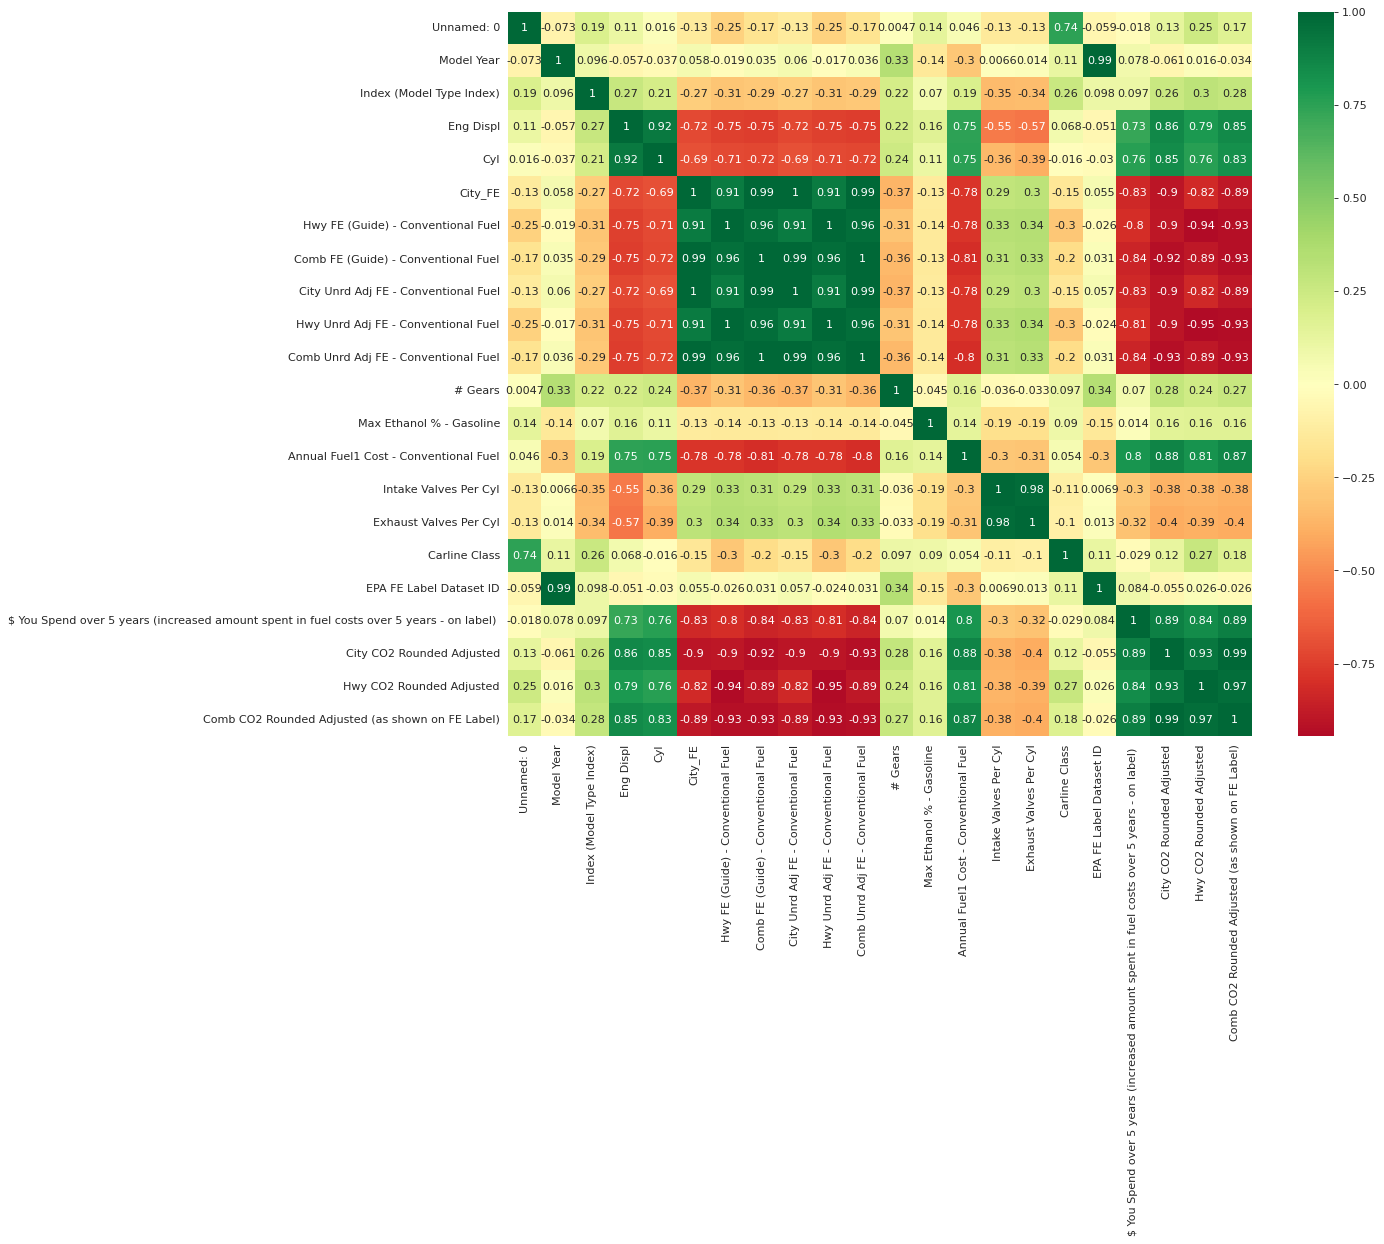

In [52]:
plt.figure(figsize=(15,12), dpi= 80)
sns.heatmap(fuel.corr(), xticklabels=fuel.corr().columns, yticklabels=fuel.corr().columns, cmap='RdYlGn', center=0, annot=True)

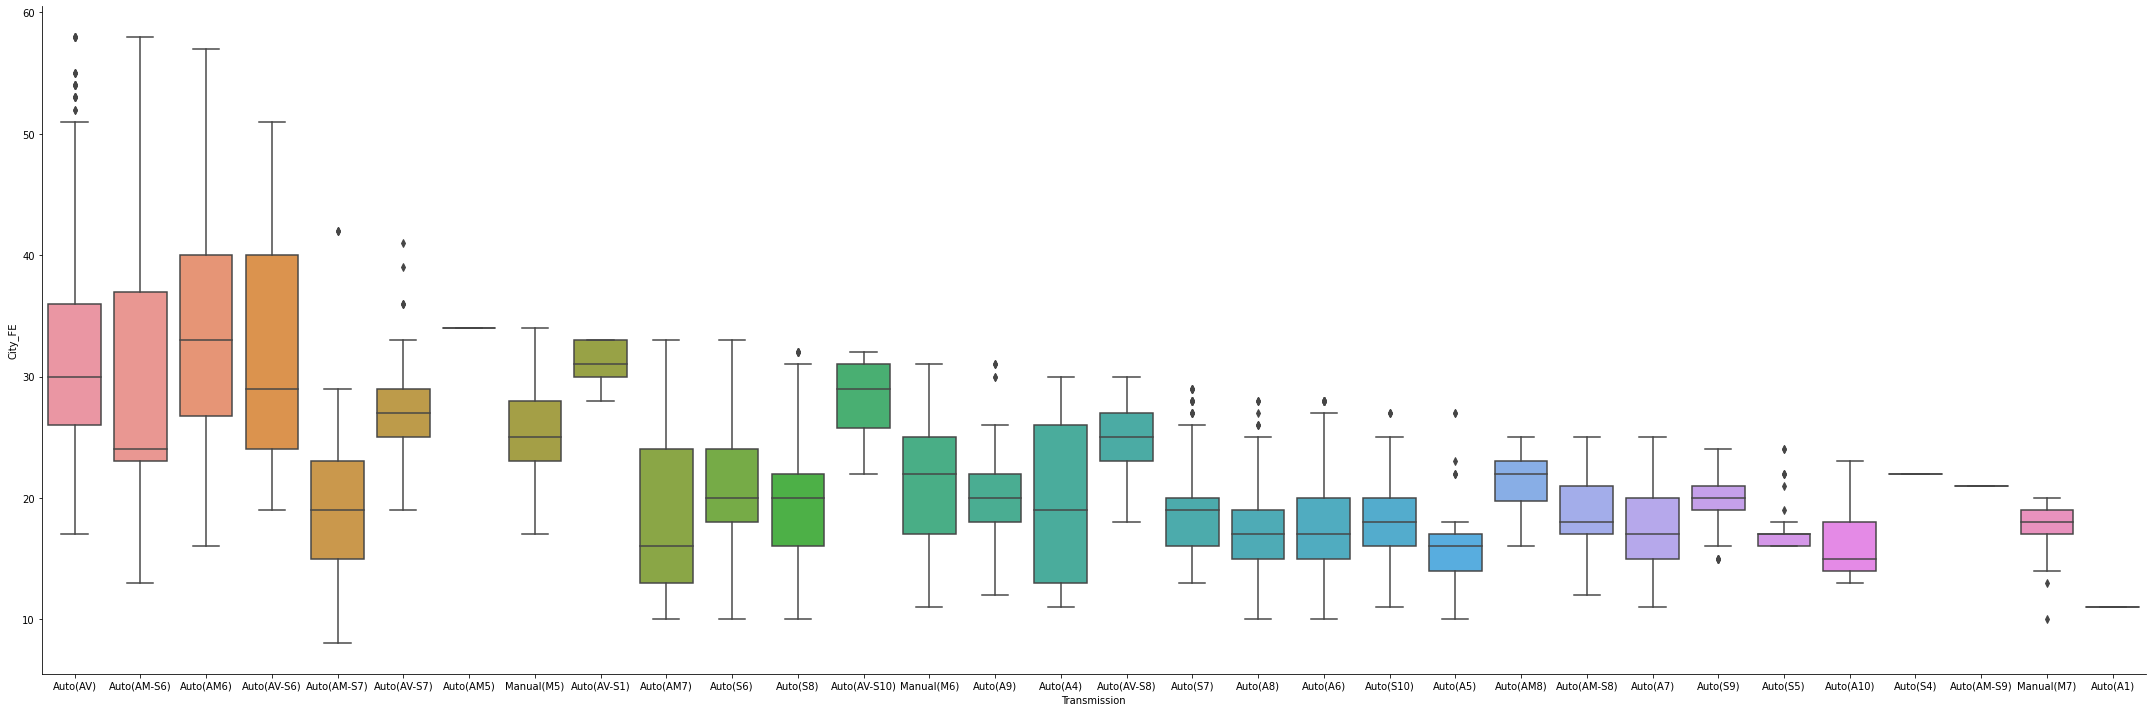

In [39]:
sns.catplot(y = 'City_FE', x = 'Transmission', data = fuel.sort_values('City_FE', ascending=False), kind = 'box', height = 10, aspect = 3)
plt.show()

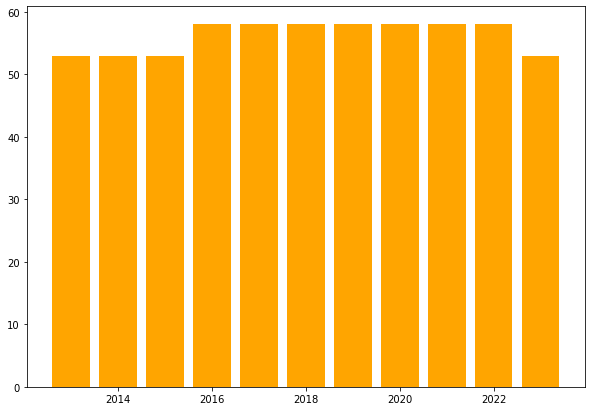

In [40]:
fig = plt.figure(figsize =(10, 7))
plt.bar(fuel['Model Year'], fuel['City_FE'], color = 'orange')
plt.show()

(array([2012., 2014., 2016., 2018., 2020., 2022., 2024.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

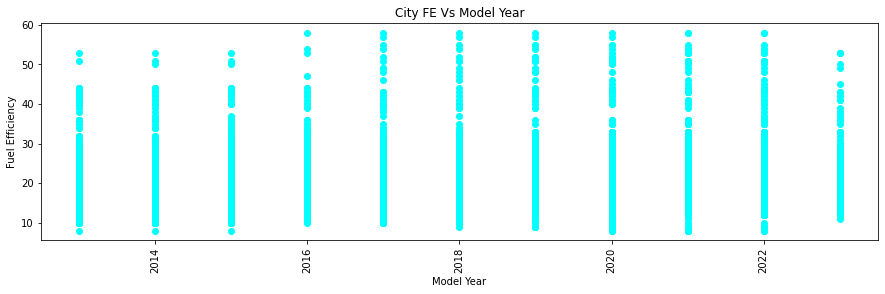

In [47]:
plt.figure(figsize = (15,4))
plt.title('City FE Vs Model Year')
plt.scatter(fuel['Model Year'], fuel['City_FE'], color="cyan")
plt.xticks
plt.xlabel('Model Year')
plt.ylabel('Fuel Efficiency')
plt.xticks(rotation = 90)

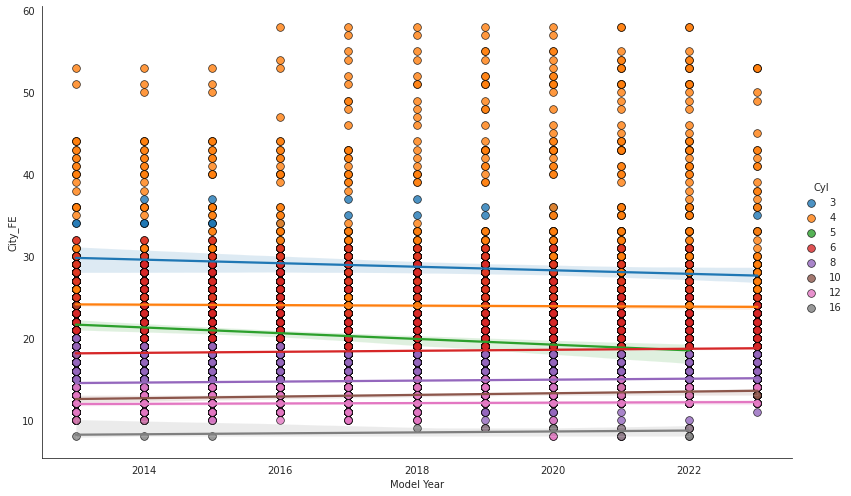

In [50]:
sns.set_style("white")
scat = sns.lmplot(x="Model Year", y="City_FE", hue="Cyl", data=fuel, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

In [ ]:
#plt.plot('Model Year', 'City_FE')
#plt.title('Fuel Efficiency by Year')
#plt.xlabel('Model Years')
#plt.ylabel('City FE')
#plt.show()

Text(0.5, 1.0, 'Cylinder Distribution')

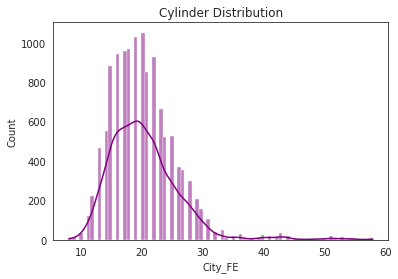

In [55]:
sns.histplot(fuel.City_FE, kde=True, color = 'purple')
plt.title('Cylinder Distribution')

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.bar(fuel['Model Year'], fuel['City_FE'], color = 'orange')
plt.show()

<font size="8">Modelling</font>

In [74]:
#Splitting the data into training and testing segments

train,test = train_test_split(fuel, train_size = 0.8, test_size = 0.2, random_state = 123)
#This is to separate the features or attribute from the target
X_train = train.drop("City_FE", axis=1)
y_train = train[["City_FE"]]

# One hot encode remaining nominal features
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)

# Combine into a pre-processing pipeline
preprocessor = ColumnTransformer(
  remainder="passthrough",
  transformers=[
   ("one-hot", encoder, selector(dtype_include="object")),
   ]
  )

In [79]:
# GBM Estimator Model Object
xgb_mod = xgb.XGBRegressor()

#Loss Function
loss = 'neg_root_mean_squared_error'

#Creating a pipeline
model_pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("xgb_mod", xgb_mod),
])


kfold = KFold(n_splits=5, random_state=123, shuffle=True)

# Setting the Hyperparameters
hyper_grid = {
  'xgb_mod__n_estimators': [1000, 2500, 5000],
  'xgb_mod__learning_rate': [0.001, 0.01, 0.1],
  'xgb_mod__max_depth': [3, 5, 7, 9],
  'xgb_mod__min_child_weight': [1, 5, 15] 
}

# Implementing a five fold CV
results = cross_val_score(model_pipeline, X_train, y_train, cv=kfold, scoring=loss)

print('Gradient Boosting RMSE: ', np.abs(np.mean(results)), end='\n\n')


# create random search object
random_search = RandomizedSearchCV(
    model_pipeline, 
    param_distributions=hyper_grid, 
    n_iter=20, 
    cv=kfold, 
    scoring=loss, 
    n_jobs=-1, 
    random_state=13
)

# Execute random search
random_search_results = random_search.fit(X_train, y_train)

# Best model score
print('Gradient Boosting random search RMSE: ', np.abs(random_search_results.best_score_), end='\n\n')

# Optimal penalty parameter in grid search
print('Optimal hyperparameter')
print("xgb_mod__n_estimators: ", random_search_results.best_estimator_.get_params().get('xgb_mod__n_estimators'))
print("xgb_mod__learning_rate: ", random_search_results.best_estimator_.get_params().get('xgb_mod__learning_rate'))
print("xgb_mod__max_depth: ", random_search_results.best_estimator_.get_params().get('xgb_mod__max_depth'))
print("xgb_mod__min_child_weight: ", random_search_results.best_estimator_.get_params().get('xgb_mod__min_child_weight'), end="\n\n")

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/emumen/.local/lib/python3.8/site-packages/sklearn/utils/_encode.py", line 173, in _unique_python
    uniques = sorted(uniques_set)
TypeError: '<' not supported between instances of 'str' and 'float'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/emumen/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/emumen/.local/lib/python3.8/site-packages/sklearn/pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/emumen/.local/lib/python3.8/site-packages/sklearn/pipeline.py", line 336, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/emumen/.local/lib/python3.8/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/emumen/.local/lib/python3.8/site-packages/sklearn/pipeline.py", line 870, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/emumen/.local/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py", line 673, in fit_transform
    result = self._fit_transform(X, y, _fit_transform_one)
  File "/home/emumen/.local/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py", line 604, in _fit_transform
    return Parallel(n_jobs=self.n_jobs)(
  File "/home/emumen/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/emumen/.local/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/emumen/.local/lib/python3.8/site-packages/joblib/parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/home/emumen/.local/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 208, in apply_async
    result = ImmediateResult(func)
  File "/home/emumen/.local/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 572, in __init__
    self.results = batch()
  File "/home/emumen/.local/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/home/emumen/.local/lib/python3.8/site-packages/joblib/parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "/home/emumen/.local/lib/python3.8/site-packages/sklearn/utils/fixes.py", line 117, in __call__
    return self.function(*args, **kwargs)
  File "/home/emumen/.local/lib/python3.8/site-packages/sklearn/pipeline.py", line 870, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/emumen/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py", line 855, in fit_transform
    return super().fit_transform(X, y)
  File "/home/emumen/.local/lib/python3.8/site-packages/sklearn/base.py", line 870, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/emumen/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py", line 818, in fit
    fit_results = self._fit(
  File "/home/emumen/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py", line 99, in _fit
    result = _unique(Xi, return_counts=return_counts)
  File "/home/emumen/.local/lib/python3.8/site-packages/sklearn/utils/_encode.py", line 41, in _unique
    return _unique_python(
  File "/home/emumen/.local/lib/python3.8/site-packages/sklearn/utils/_encode.py", line 178, in _unique_python
    raise TypeError(
TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'int', 'str']
